In [1]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset

# Load CNN/DailyMail dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Display dataset structure
print(dataset)

# Access train, validation, and test splits
train_data = dataset["train"]
val_data = dataset["validation"]
test_data = dataset["test"]

# Print a sample from the dataset
print("Sample Article:", train_data[0]["article"])
print("Sample Summary:", train_data[0]["highlights"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})
Sample Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month.

In [3]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `Transformer Paper` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `

In [4]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("google-t5/t5-base")
model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-base")

# Test tokenizer on a sample article
sample_text = train_data[0]["article"]
inputs = tokenizer("summarize: " + sample_text, return_tensors="pt", max_length=512, truncation=True)
print("Tokenized Input IDs:", inputs["input_ids"])

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Tokenized Input IDs: tensor([[21603,    10,   301, 24796,  4170,     6,  2789,    41, 18844,    61,
          1636,  8929, 16023,  2213,  4173,  6324, 12591,    15, 11391,   592,
            12,     3,     9,  2196,  3996,  1755,   770,  8785,   591, 11039,
           770,    61, 13462,    38,     3,    88,  5050,   507,    30,  2089,
             6,    68,     3,    88, 10419,     7,     8,   540,   751,    31,
            17,  4061,     3,     9, 10783,    30,   376,     5,  4173,  6324,
         12591,    15,    38,  8929, 16023,    16,    96, 15537,   651, 16023,
            11,     8,  5197,    13,     8, 12308,   121,   304,     8, 19142,
            13, 29517,  6710,   343,     7,   300,     8,   296,     6,     8,
          1021,  7556,   845,     3,    88,    65,   150,  1390,    12,  9030,
            17,   449,   112,  1723,   550,    30,  1006,  2948,     6,  3281,
            11, 17086,  2251,     5,    96,   196,   278,    31,    17,   515,
            12,    36,    80,  

In [5]:
# Generate a summary from the tokenized input
outputs = model.generate(inputs["input_ids"], max_length=128, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
summary = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Generated Summary:", summary)

Generated Summary: young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties . at 18, he will be able to gamble in a casino, buy a drink in a pub or see "Hostel: Part II" details of how he'll mark his landmark birthday are under wraps .


In [6]:
# Shuffle and sample 10,000 rows for training and validation
train_data = dataset["train"].shuffle(seed=42).select(range(10000))
val_data = dataset["validation"].shuffle(seed=42).select(range(10000))

# Define a preprocessing function
def preprocess_data(batch):
    # Add the "summarize:" prefix to input text to specify the summarization task
    inputs = ["summarize: " + article for article in batch["article"]]

    # Tokenize the input articles
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    # Tokenize the target summaries (labels)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(batch["highlights"], max_length=128, truncation=True, padding="max_length")

    # Add tokenized labels to the model inputs
    model_inputs["labels"] = labels["input_ids"]

    return model_inputs

# Apply preprocessing to the dataset
train_data = train_data.map(preprocess_data, batched=True, remove_columns=["article", "highlights", "id"])
val_data = val_data.map(preprocess_data, batched=True, remove_columns=["article", "highlights", "id"])

# Display a sample from the preprocessed dataset
print(train_data[0])

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4114: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

{'input_ids': [21603, 10, 938, 3, 5, 11016, 12528, 3, 5, 3, 10744, 8775, 20619, 2326, 10, 3, 5, 10668, 10, 4928, 3, 6038, 6, 204, 1332, 2038, 3, 5, 1820, 3, 5, 3, 6880, 4296, 11430, 10, 3, 5, 12046, 10, 4560, 3, 6038, 6, 204, 1332, 2038, 3, 5, 5245, 724, 13, 8, 337, 384, 113, 3977, 16, 3, 9, 14491, 22133, 45, 4146, 1911, 6778, 15, 14566, 53, 133, 43, 118, 25429, 3, 31, 4065, 77, 676, 31, 6, 16273, 7, 243, 469, 5, 37, 5678, 13, 4464, 1158, 1079, 11, 31423, 6176, 130, 3883, 5815, 70, 3062, 6, 7758, 60, 35, 6, 44, 8, 1156, 234, 79, 2471, 30, 4691, 1635, 109, 1210, 1061, 16, 5184, 12940, 6, 4653, 26334, 5, 37, 16, 10952, 7, 43, 230, 2946, 139, 8, 14319, 336, 1856, 6, 28, 16273, 7, 2145, 8, 386, 3977, 590, 28, 8, 384, 31, 7, 3947, 1782, 6, 13, 4146, 1911, 6778, 15, 14566, 53, 45, 3, 9, 21859, 5, 21902, 447, 10, 37, 16, 10952, 7, 43, 2946, 139, 8, 14319, 13, 386, 724, 13, 8, 337, 384, 113, 130, 435, 16, 70, 14491, 22133, 336, 1851, 5, 1079, 11, 31423, 6176, 33, 3, 22665, 3, 5, 71, 210, 1329,

In [7]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save the model checkpoints
    evaluation_strategy="epoch",        # Evaluate after each epoch
    learning_rate=5e-5,                 # Learning rate
    per_device_train_batch_size=4,      # Reduced batch size for larger model
    per_device_eval_batch_size=4,       # Reduced batch size for evaluation
    num_train_epochs=3,                 # Number of training epochs
    weight_decay=0.01,                  # Weight decay for regularization
    save_total_limit=2,                 # Limit the number of saved checkpoints
    logging_dir="./logs",               # Directory to save logs
    logging_steps=500,                  # Log every 500 steps
    save_strategy="epoch",              # Save the model at the end of every epoch
    load_best_model_at_end=True,        # Load the best model based on evaluation metric
    metric_for_best_model="eval_loss",  # Metric to determine the best model
    report_to="none"                    # Disable wandb logging
)

# Define a Trainer instance
trainer = Trainer(
    model=model,                          # The T5-base model to train
    args=training_args,                   # Training arguments
    train_dataset=train_data,             # Training dataset
    eval_dataset=val_data,                # Validation dataset
    tokenizer=tokenizer,                  # Tokenizer for input processing
)

# Train the model
trainer.train()

# Save the fine-tuned model and tokenizer
model.save_pretrained("./t5-base-finetuned")  # Update to save the T5-base model
tokenizer.save_pretrained("./t5-base-finetuned")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-7-c97e020adece>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,0.925300,0.996368
2,0.846800,0.998347
3,0.808900,1.006016


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


('./t5-base-finetuned/tokenizer_config.json',
 './t5-base-finetuned/special_tokens_map.json',
 './t5-base-finetuned/spiece.model',
 './t5-base-finetuned/added_tokens.json',
 './t5-base-finetuned/tokenizer.json')

In [9]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the fine-tuned T5-base model and tokenizer
model = AutoModelForSeq2SeqLM.from_pretrained("./t5-base-finetuned")
tokenizer = AutoTokenizer.from_pretrained("./t5-base-finetuned")

# Set the model to evaluation mode
model.eval()

# Define a function to generate summaries
def generate_summary(article, max_input_length=512, max_output_length=128):
    """
    Generate a summary for a given article.

    Args:
        article (str): The input text (news article).
        max_input_length (int): Maximum token length for the input text.
        max_output_length (int): Maximum token length for the output summary.

    Returns:
        str: The generated summary.
    """
    # Tokenize the input article
    inputs = tokenizer(
        "summarize: " + article,
        return_tensors="pt",
        max_length=max_input_length,
        truncation=True
    )

    # Generate the summary
    outputs = model.generate(
        inputs["input_ids"],
        max_length=max_output_length,
        min_length=30,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    # Decode the output tokens
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Test the function with a sample article from the test dataset
test_article = dataset["test"][0]["article"]
true_summary = dataset["test"][0]["highlights"]

# Generate the summary
generated_summary = generate_summary(test_article)

# Print the original article, true summary, and generated summary
print("Original Article:")
print(test_article)
print("\nTrue Summary:")
print(true_summary)
print("\nGenerated Summary:")
print(generated_summary)

Original Article:
(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking at Wednes

In [10]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.5 MB/s eta 0:00:00


In [11]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=527670e4fec49e53bf6d236354e731a529b1a10efc9cb74aa123cd9470833422
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [12]:
from evaluate import load

# Load ROUGE metric
rouge = load("rouge")

# Generate summaries for the test dataset
def evaluate_model(dataset, max_samples=100):
    predictions = []
    references = []
    for i in range(min(max_samples, len(dataset))):
        article = dataset[i]["article"]
        reference = dataset[i]["highlights"]
        prediction = generate_summary(article)
        predictions.append(prediction)
        references.append(reference)
    return predictions, references

# Get predictions and references
predictions, references = evaluate_model(dataset["test"])

# Compute ROUGE scores
rouge_score = rouge.compute(predictions=predictions, references=references)
print("ROUGE Scores:", rouge_score)

ROUGE Scores: {'rouge1': 0.3302900943667364, 'rouge2': 0.13689271759556568, 'rougeL': 0.2541750153094671, 'rougeLsum': 0.28234117467808395}


The T5-base model demonstrates the ability to generate concise and fluent summaries. The generated summary successfully captures important details, such as the Palestinian Authority becoming the 123rd member of the International Criminal Court and the initiation of a preliminary examination in Palestinian territories.

The ROUGE scores for the model are as follows: ROUGE-1 at 0.33, ROUGE-2 at 0.137, ROUGE-L at 0.254, and ROUGE-Lsum at 0.282. These scores indicate a moderate level of overlap and structural alignment with the reference summaries.

While the model performs well in producing readable and coherent summaries, it occasionally misses critical information, such as details about opposition from the United States and Israel or the broader implications of the preliminary examination. Further adjustments in the future may improve its ability to encapsulate all essential points.

In [14]:
model.save_pretrained("./t5-base-finetuned")
tokenizer.save_pretrained("./t5-base-finetuned")

('./t5-base-finetuned/tokenizer_config.json',
 './t5-base-finetuned/special_tokens_map.json',
 './t5-base-finetuned/spiece.model',
 './t5-base-finetuned/added_tokens.json',
 './t5-base-finetuned/tokenizer.json')

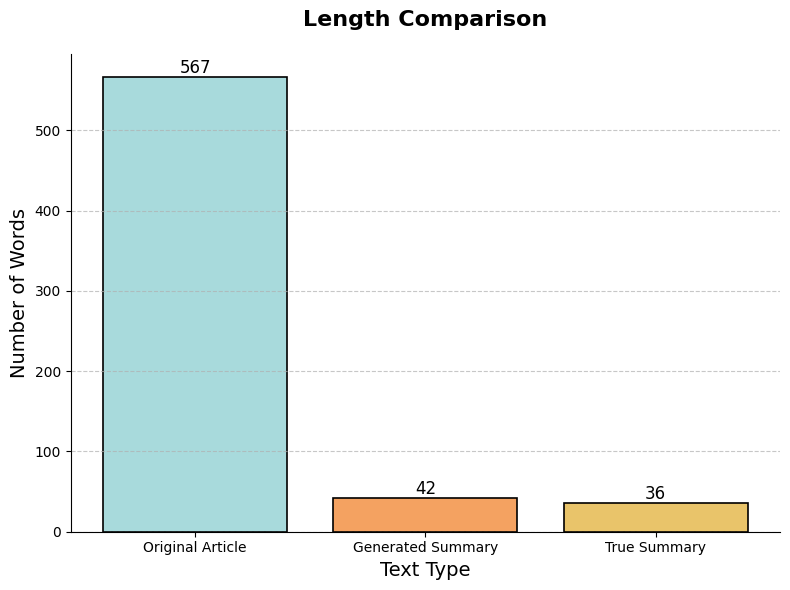

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data for length comparison
original_length = len(test_article.split())
generated_length = len(generated_summary.split())
true_summary_length = len(true_summary.split())

# Plot: Comparison of lengths
fig, ax = plt.subplots(figsize=(8, 6))
labels = ["Original Article", "Generated Summary", "True Summary"]
lengths = [original_length, generated_length, true_summary_length]

bars = ax.bar(labels, lengths, color=["#A8DADC", "#F4A261", "#E9C46A"], edgecolor="black", linewidth=1.2)

# Add value annotations on the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height}", ha='center', va='bottom', fontsize=12)

# Add titles and labels
ax.set_title("Length Comparison", fontsize=16, weight="bold", pad=20)
ax.set_ylabel("Number of Words", fontsize=14)
ax.set_xlabel("Text Type", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("length_comparison.png")  # Save for Streamlit
plt.show()

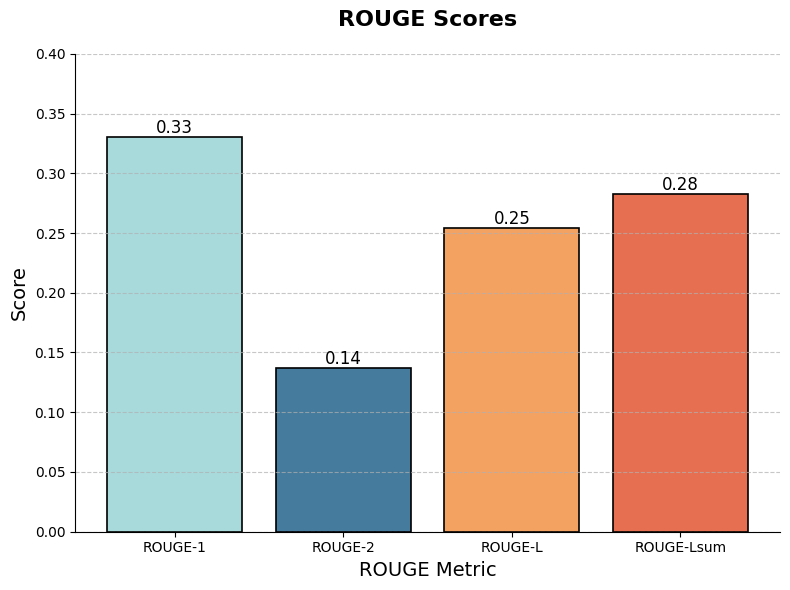

In [22]:
# Data for ROUGE scores
rouge_scores = {
    "ROUGE-1": 0.3302900943667364,
    "ROUGE-2": 0.13689271759556568,
    "ROUGE-L": 0.2541750153094671,
    "ROUGE-Lsum": 0.28234117467808395
}

fig, ax = plt.subplots(figsize=(8, 6))
labels = list(rouge_scores.keys())
scores = list(rouge_scores.values())

bars = ax.bar(labels, scores, color=["#A8DADC", "#457B9D", "#F4A261", "#E76F51"], edgecolor="black", linewidth=1.2)

# Add value annotations on the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha='center', va='bottom', fontsize=12)

# Add titles and labels
ax.set_title("ROUGE Scores", fontsize=16, weight="bold", pad=20)
ax.set_ylabel("Score", fontsize=14)
ax.set_xlabel("ROUGE Metric", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 0.4)  # Adjust the y-axis limit for better visualization

plt.tight_layout()
plt.savefig("rouge_scores.png")  # Save for Streamlit
plt.show()